In [20]:
import json
import pandas as pd

import seaborn as sns

In [2]:
with open("../../output_analysis/Mistral-7b-Instruct__instruction_0_fine_tune_train.json", "r") as jsonfile:
    train_preds = json.load(jsonfile)
    train_preds = pd.DataFrame(**train_preds)

with open("../../output_analysis/Mistral-7b-Instruct__instruction_0_fine_tune_dev.json", "r") as jsonfile:
    dev_preds = json.load(jsonfile)
    dev_preds = pd.DataFrame(**dev_preds)

## Check errors in Train

In [3]:
train_preds.columns

Index(['id', 'section', 'type', 'text', 'input_length', 'max_new_tokens',
       'labels', 'predictions', 'original_predictions'],
      dtype='object')

In [4]:
incorrect_train_preds = train_preds.loc[train_preds["labels"] != train_preds["predictions"]]

## Type distribution in incorrect predictions

<Axes: xlabel='type', ylabel='count'>

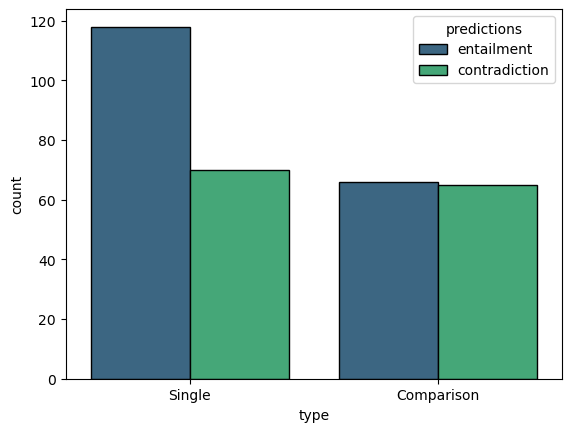

In [24]:
sns.countplot(x='type', data=incorrect_train_preds, hue='predictions', palette='viridis', edgecolor='black')

## Section distribution in incorrect predictions

<Axes: xlabel='section', ylabel='count'>

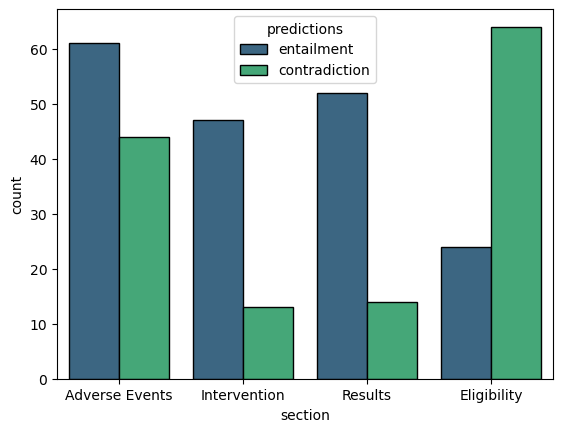

In [25]:
sns.countplot(x='section', data=incorrect_train_preds, hue='predictions', palette='viridis', edgecolor='black')

<Axes: xlabel='input_length', ylabel='Count'>

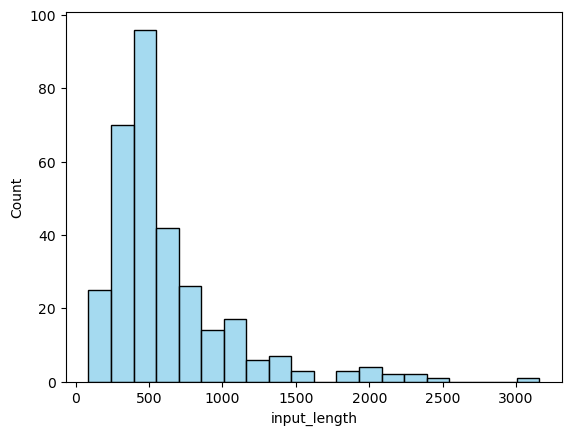

In [26]:
sns.histplot(incorrect_train_preds['input_length'], bins=20, color='skyblue', edgecolor='black', kde=False)

In [11]:
incorrect_train_preds.loc[incorrect_train_preds["section"] == "Adverse Events"]

,id,section,type,text,input_length,max_new_tokens,labels,predictions,original_predictions
9,714c540c-1fa1-47c7-ac13-1e8f056d1e31,Adverse Events,Single,Evidence: primary trial: Adverse Events 1: T...,335,8,contradiction,entailment,Entailment
32,b4c97206-66fd-468b-8388-fac076222c10,Adverse Events,Single,Evidence: primary trial: Adverse Events 1: T...,526,8,contradiction,entailment,Entailment
61,72619b0a-57c2-465c-8428-72019b59f8ae,Adverse Events,Single,Evidence: primary trial: Adverse Events 1: T...,510,8,entailment,contradiction,Contradiction
63,92ace4fa-4426-4f34-af52-ee62913e60aa,Adverse Events,Comparison,Evidence: primary trial: Adverse Events 1: T...,702,8,contradiction,entailment,Entailment
91,6a013bb4-0688-4f02-96c5-062f3ca67ae1,Adverse Events,Single,Evidence: primary trial: Adverse Events 1: T...,324,8,contradiction,entailment,Entailment
...,...,...,...,...,...,...,...,...,...
1577,6224d2de-c62b-4b43-8517-475eaa565491,Adverse Events,Single,Evidence: primary trial: Adverse Events 1: T...,272,8,contradiction,entailment,Entailment
1588,9ad3444c-143d-4c28-a08a-e0c9cda44900,Adverse Events,Comparison,Evidence: primary trial: Adverse Events 1: T...,510,8,contradiction,entailment,Entailment
1611,7990b9bf-ac76-4f21-b9a1-5e0b4d91b9a9,Adverse Events,Single,Evidence: primary trial: Adverse Events 1: T...,471,8,contradiction,entailment,Entailment
1621,a81e4dbe-e9cf-4f2b-b2f7-b1bf6d630c42,Adverse Events,Comparison,Evidence: primary trial: Adverse Events 1: T...,745,8,contradiction,entailment,Entailment


In [27]:
incorrect_train_preds.loc[incorrect_train_preds["id"] == "adfc79ba-2996-47ce-9986-7d287931df89"]

,id,section,type,text,input_length,max_new_tokens,labels,predictions,original_predictions
